**Sales forecasting on Furniture category**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df= pd.read_excel("C:/Users/supri/dataset1.xlsx")
df.head(5)

,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,...,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Order Month,Order Year,Order Day,Profit_qt
0,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,35.00,Muhammed MacIntyre,...,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20,10,2010,13,-9223.021619
1,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,68.02,Barry French,...,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02,10,2012,1,21056.415033
2,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,2.99,Barry French,...,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03,10,2012,1,12708.229234
3,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,3.99,Clay Rozendal,...,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12,7,2011,10,24538.572086
4,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,5.94,Carlos Soltero,...,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30,8,2010,28,11299.329077


In [3]:
df = df.loc[df['Product Category'] == 'Furniture']
df = df[['Order Date', 'Sales']]
df = df.groupby(pd.Grouper(key='Order Date', freq='MS')).sum().reset_index() #resampled on monthly basis
df

,Order Date,Sales
0,2009-01-01,201853.238
1,2009-02-01,142695.542
2,2009-03-01,112785.198
3,2009-04-01,138200.638
4,2009-05-01,75853.000
5,2009-06-01,93601.324
6,2009-07-01,93205.572
7,2009-08-01,129690.354
8,2009-09-01,90496.824
9,2009-10-01,79766.490


In [4]:
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]
print(train.shape,test.shape)

(38, 2) (10, 2)


**Linear Regression Model**

In [5]:
model = LinearRegression()
model.fit(train.index.values.reshape(-1,1), train['Sales'])

LinearRegression()

In [6]:
predictions = model.predict(test.index.values.reshape(-1,1))

In [7]:
rmse = np.sqrt(mean_squared_error(test['Sales'], predictions))
print('RMSE:', rmse)

RMSE: 26321.14873389183


In [8]:
# Define future index for prediction
future_index = pd.date_range(df['Order Date'].iloc[-1], periods=48, freq='MS')

# Generate predictions for future sales
future_sales = model.predict(np.arange(len(df), len(df)+48).reshape(-1,1))

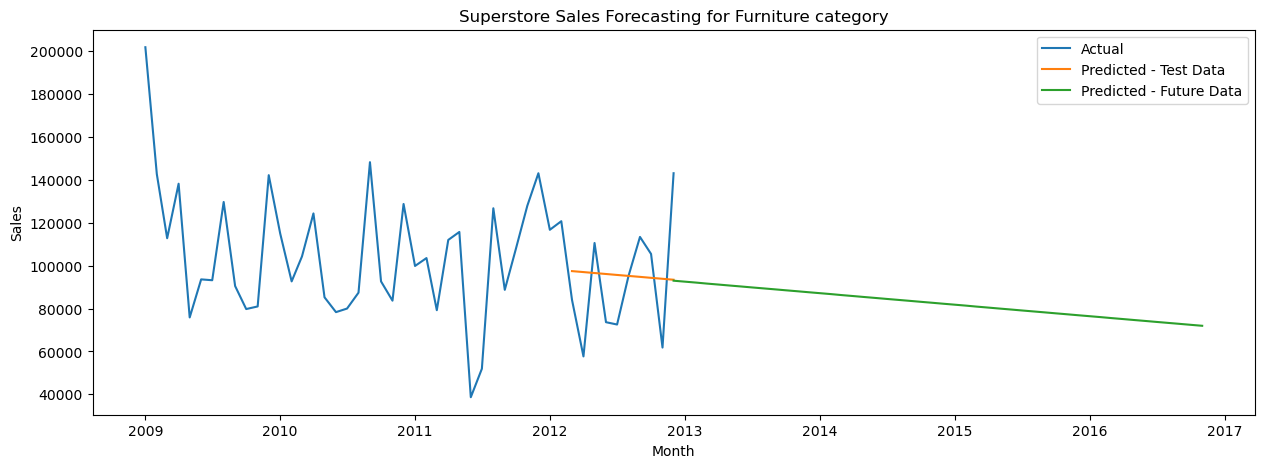

In [9]:
plt.figure(figsize=(15,5))
plt.plot(df['Order Date'], df['Sales'], label='Actual')
plt.plot(test['Order Date'], predictions, label='Predicted - Test Data')
plt.plot(future_index, future_sales, label='Predicted - Future Data')
plt.legend()
plt.title('Superstore Sales Forecasting for Furniture category')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

**Random Forest Regression**

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
model = RandomForestRegressor(n_estimators=25, random_state=0)
model.fit(train.index.values.reshape(-1,1), train['Sales'])   #feature i.e, date and target variable ie., sales

RandomForestRegressor(n_estimators=25, random_state=0)

In [12]:
predictions = model.predict(test.index.values.reshape(-1,1))

In [13]:
print('Coefficient of determination: %.2f' % r2_score(test['Sales'], predictions))
rmse = np.sqrt(mean_squared_error(test['Sales'], predictions))
print('RMSE:', rmse)

Coefficient of determination: -1.30
RMSE: 38605.25051983937


In [14]:
# Define future index for prediction for next 48months
future_index = pd.date_range(df['Order Date'].iloc[-1], periods=48, freq='MS')

# Generate predictions for future sales
future_sales = model.predict(np.arange(len(df), len(df)+48).reshape(-1,1))

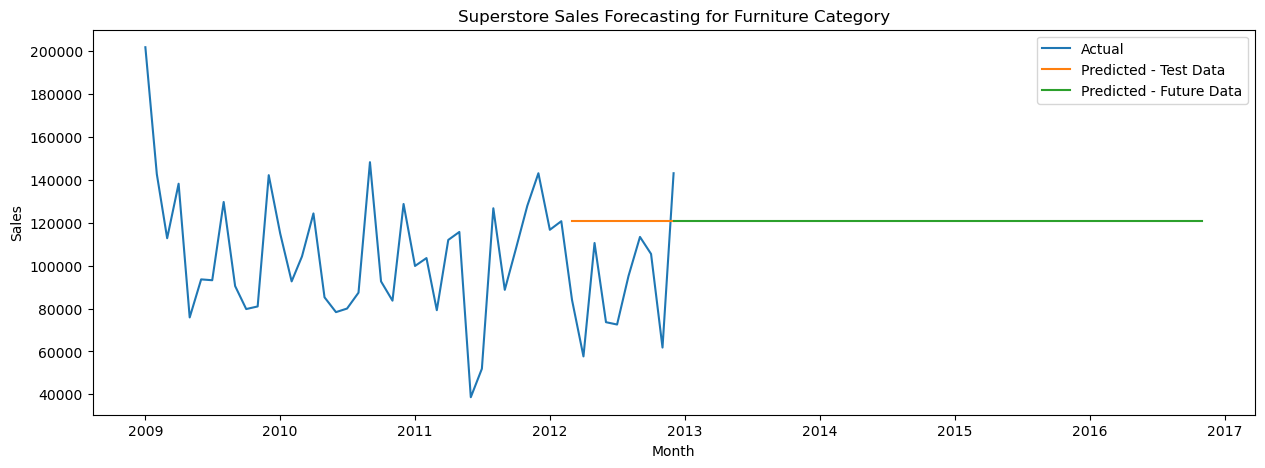

In [15]:
plt.figure(figsize=(15,5))
plt.plot(df['Order Date'], df['Sales'], label='Actual')
plt.plot(test['Order Date'], predictions, label='Predicted - Test Data')
plt.plot(future_index, future_sales, label='Predicted - Future Data')
plt.legend()
plt.title('Superstore Sales Forecasting for Furniture Category')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

**Gradient Boosting regression**

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [17]:
# Load the dataset
df =pd.read_excel("C:/Users/supri/dataset1.xlsx")
df = df.loc[df['Product Category'] == 'Office Supplies']
# Convert the 'Order Date' column to datetime format and set it as the index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Aggregate the sales data by month
df_monthly = df['Sales'].resample('MS').sum()

In [18]:
# Create a lag feature
df_monthly_shifted = df_monthly.shift(1)

# Create a new DataFrame with lagged feature and remove the first row
df_gb = pd.concat([df_monthly_shifted, df_monthly], axis=1)
df_gb.columns = ['Sales_Lag1', 'Sales']
df_gb.dropna(inplace=True)

In [19]:
# Split the data into training and testing sets
train_size = int(len(df_gb) * 0.8)
train, test = df_gb.iloc[0:train_size], df_gb.iloc[train_size:len(df_gb)]

# Prepare the data for training and testing
X_train, y_train = train['Sales_Lag1'].values.reshape(-1, 1), train['Sales'].values
X_test, y_test = test['Sales_Lag1'].values.reshape(-1, 1), test['Sales'].values

In [20]:
# Create and fit the Gradient Boosting Regression model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=0)

In [21]:
# Make predictions on the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Make predictions on future data
future_index = pd.date_range(df_gb.index[-1], periods=48, freq='MS')
future_sales = model.predict(df_monthly[-1:].values.reshape(-1, 1))
for i in range(47):
    future_sales = np.append(future_sales, model.predict(future_sales[-1:].reshape(-1, 1)))

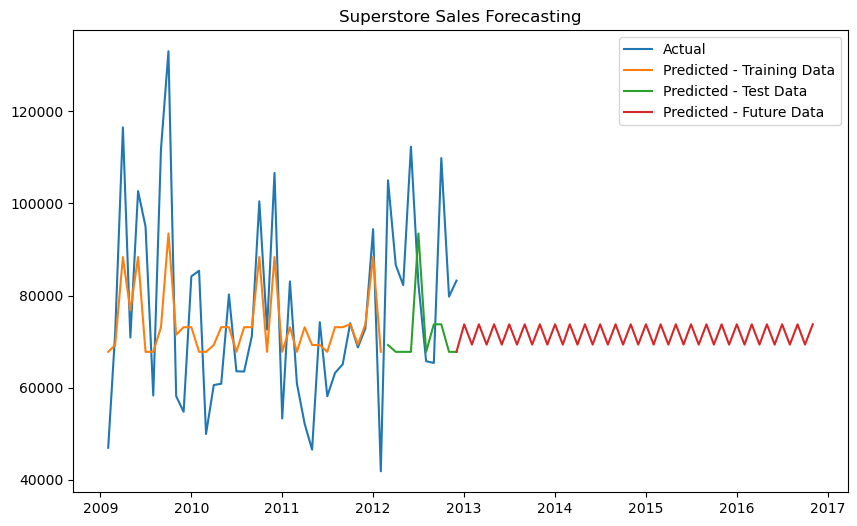

In [22]:
# Plot the actual, predicted and future sales data
fig=plt.figure(figsize=(10,6))
plt.plot(df_gb.index, df_gb['Sales'], label='Actual')
plt.plot(train.index, train_predictions, label='Predicted - Training Data')
plt.plot(test.index, test_predictions, label='Predicted - Test Data')
plt.plot(future_index, future_sales, label='Predicted - Future Data')
plt.legend()
plt.title('Superstore Sales Forecasting')
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('RMSE:', rmse)


RMSE: 23885.499269302596


**Sales forecasting on Office Supplies category**

In [24]:
df= pd.read_excel("C:/Users/supri/dataset1.xlsx")
df.head(5)

,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,...,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Order Month,Order Year,Order Day,Profit_qt
0,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,35.00,Muhammed MacIntyre,...,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20,10,2010,13,-9223.021619
1,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,68.02,Barry French,...,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02,10,2012,1,21056.415033
2,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,2.99,Barry French,...,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03,10,2012,1,12708.229234
3,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,3.99,Clay Rozendal,...,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12,7,2011,10,24538.572086
4,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,5.94,Carlos Soltero,...,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30,8,2010,28,11299.329077


**Linear Regression**

In [25]:
df = df.loc[df['Product Category'] == 'Office Supplies']
df = df[['Order Date', 'Sales']]
df = df.groupby(pd.Grouper(key='Order Date', freq='MS')).sum().reset_index() #resampled on monthly basis
df

,Order Date,Sales
0,2009-01-01,110287.10
1,2009-02-01,46964.65
2,2009-03-01,71887.65
3,2009-04-01,116496.85
4,2009-05-01,70888.57
5,2009-06-01,102669.49
6,2009-07-01,94971.51
7,2009-08-01,58315.19
8,2009-09-01,111796.45
9,2009-10-01,133019.75


In [26]:
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]
print(train.shape,test.shape)

(38, 2) (10, 2)


In [27]:
model = LinearRegression()
model.fit(train.index.values.reshape(-1,1), train['Sales'])

LinearRegression()

In [28]:
predictions = model.predict(test.index.values.reshape(-1,1))

In [29]:
rmse = np.sqrt(mean_squared_error(test['Sales'], predictions))
print('RMSE:', rmse)

RMSE: 32472.59510305887


In [30]:
# Define future index for prediction
future_index = pd.date_range(df['Order Date'].iloc[-1], periods=48, freq='MS')

# Generate predictions for future sales
future_sales = model.predict(np.arange(len(df), len(df)+48).reshape(-1,1))

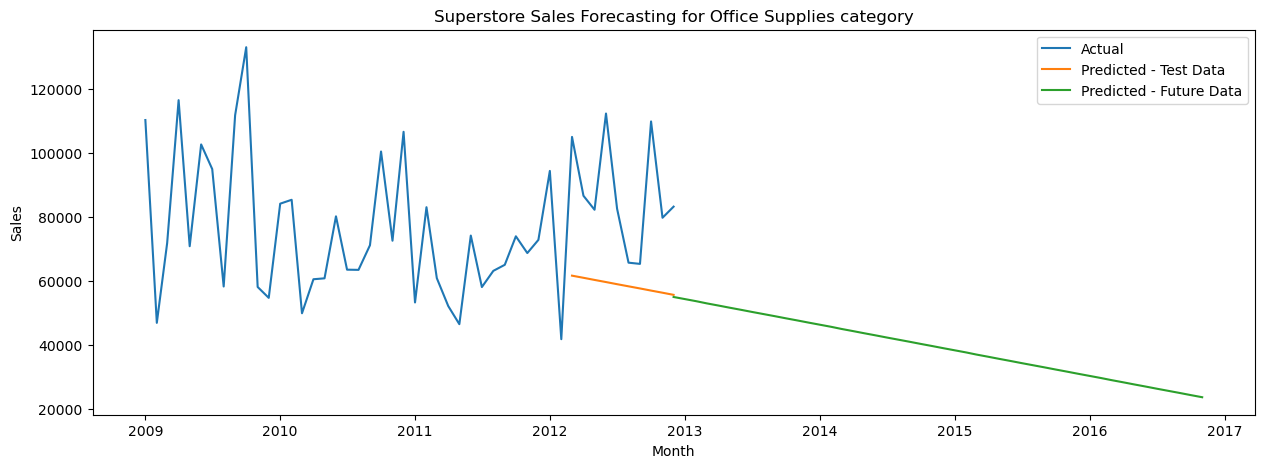

In [31]:
plt.figure(figsize=(15,5))
plt.plot(df['Order Date'], df['Sales'], label='Actual')
plt.plot(test['Order Date'], predictions, label='Predicted - Test Data')
plt.plot(future_index, future_sales, label='Predicted - Future Data')
plt.legend()
plt.title('Superstore Sales Forecasting for Office Supplies category')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

**Random Forest Regression**

In [32]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
model = RandomForestRegressor(n_estimators=25, random_state=0)
model.fit(train.index.values.reshape(-1,1), train['Sales'])   #feature i.e, date and target variable ie., sales

RandomForestRegressor(n_estimators=25, random_state=0)

In [34]:
predictions = model.predict(test.index.values.reshape(-1,1))

In [35]:
print('Coefficient of determination: %.2f' % r2_score(test['Sales'], predictions))
rmse = np.sqrt(mean_squared_error(test['Sales'], predictions))
print('RMSE:', rmse)

Coefficient of determination: -2.23
RMSE: 28515.917844678523


In [36]:
# Define future index for prediction for next 48months
future_index = pd.date_range(df['Order Date'].iloc[-1], periods=48, freq='MS')

# Generate predictions for future sales
future_sales = model.predict(np.arange(len(df), len(df)+48).reshape(-1,1))

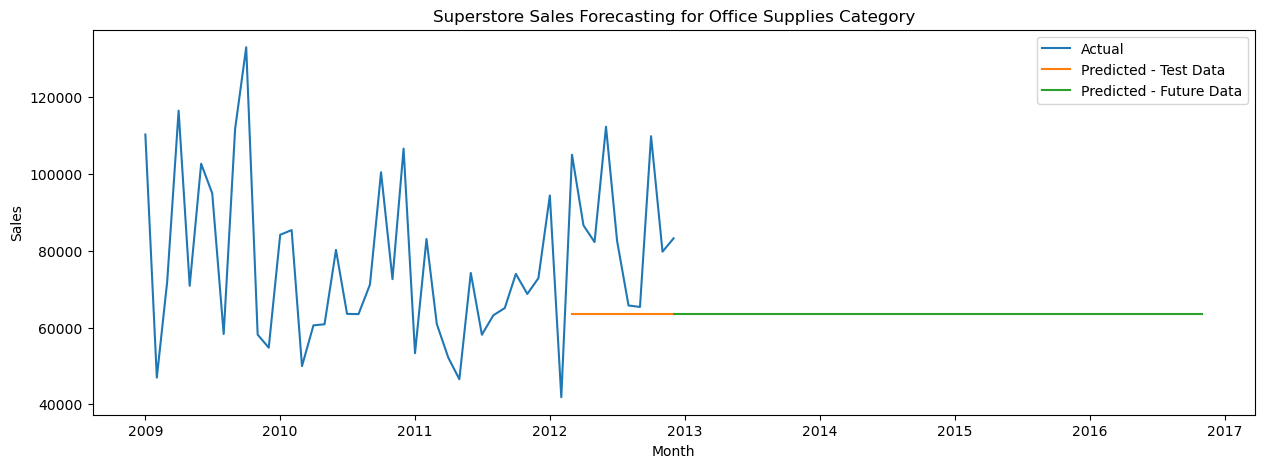

In [37]:
plt.figure(figsize=(15,5))
plt.plot(df['Order Date'], df['Sales'], label='Actual')
plt.plot(test['Order Date'], predictions, label='Predicted - Test Data')
plt.plot(future_index, future_sales, label='Predicted - Future Data')
plt.legend()
plt.title('Superstore Sales Forecasting for Office Supplies Category')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

**Gradient Boosting Regression**

In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [39]:
# Load the dataset
df = pd.read_excel("C:/Users/supri/dataset1.xlsx")
df = df.loc[df['Product Category'] == 'Furniture']
# Convert the 'Order Date' column to datetime format and set it as the index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Aggregate the sales data by month
df_monthly = df['Sales'].resample('MS').sum()

In [40]:
# Create a lag feature
df_monthly_shifted = df_monthly.shift(1)

# Create a new DataFrame with lagged feature and remove the first row
df_gb = pd.concat([df_monthly_shifted, df_monthly], axis=1)
df_gb.columns = ['Sales_Lag1', 'Sales']
df_gb.dropna(inplace=True)

In [41]:
# Split the data into training and testing sets
train_size = int(len(df_gb) * 0.8)
train, test = df_gb.iloc[0:train_size], df_gb.iloc[train_size:len(df_gb)]

# Prepare the data for training and testing
X_train, y_train = train['Sales_Lag1'].values.reshape(-1, 1), train['Sales'].values
X_test, y_test = test['Sales_Lag1'].values.reshape(-1, 1), test['Sales'].values

In [42]:
# Create and fit the Gradient Boosting Regression model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=0)

In [43]:
# Make predictions on the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Make predictions on future data
future_index = pd.date_range(df_gb.index[-1], periods=48, freq='MS')
future_sales = model.predict(df_monthly[-1:].values.reshape(-1, 1))
for i in range(47):
    future_sales = np.append(future_sales, model.predict(future_sales[-1:].reshape(-1, 1)))

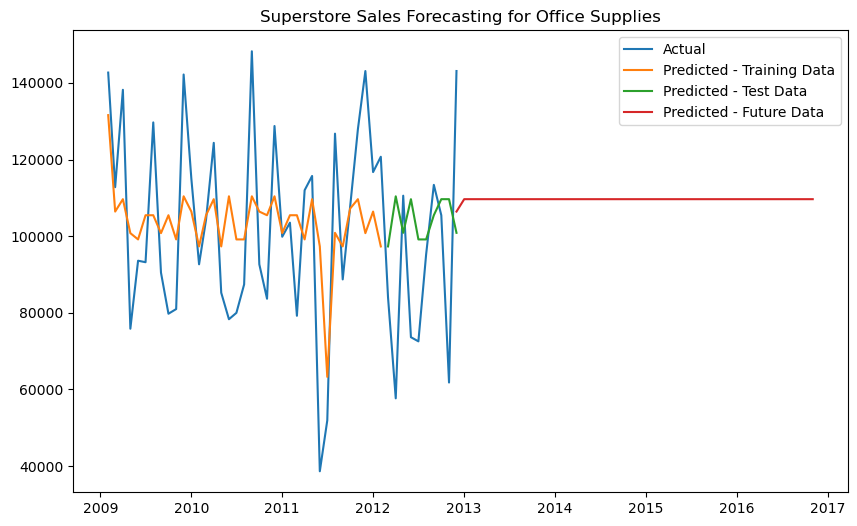

In [44]:
# Plot the actual, predicted and future sales data
fig=plt.figure(figsize=(10,6))
plt.plot(df_gb.index, df_gb['Sales'], label='Actual')
plt.plot(train.index, train_predictions, label='Predicted - Training Data')
plt.plot(test.index, test_predictions, label='Predicted - Test Data')
plt.plot(future_index, future_sales, label='Predicted - Future Data')
plt.legend()
plt.title('Superstore Sales Forecasting for Office Supplies')
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('RMSE:', rmse)

RMSE: 30370.06681492496


**Sales forecasting on Technology category**

In [46]:
df= pd.read_excel("C:/Users/supri/dataset1.xlsx")
df.head(5)

,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,...,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Order Month,Order Year,Order Day,Profit_qt
0,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,35.00,Muhammed MacIntyre,...,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20,10,2010,13,-9223.021619
1,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,68.02,Barry French,...,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02,10,2012,1,21056.415033
2,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,2.99,Barry French,...,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03,10,2012,1,12708.229234
3,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,3.99,Clay Rozendal,...,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12,7,2011,10,24538.572086
4,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,5.94,Carlos Soltero,...,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30,8,2010,28,11299.329077


In [47]:
df = df.loc[df['Product Category'] == 'Technology']
df = df[['Order Date', 'Sales']]
df = df.groupby(pd.Grouper(key='Order Date', freq='MS')).sum().reset_index() #resampled on monthly basis
df

,Order Date,Sales
0,2009-01-01,196635.7515
1,2009-02-01,140274.5545
2,2009-03-01,226955.8810
3,2009-04-01,129020.3440
4,2009-05-01,57440.9280
5,2009-06-01,57583.3140
6,2009-07-01,188380.9380
7,2009-08-01,138337.0910
8,2009-09-01,105580.5505
9,2009-10-01,140837.2965


In [48]:
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]
print(train.shape,test.shape)

(38, 2) (10, 2)


**Linear Regression**

In [49]:
model = LinearRegression()
model.fit(train.index.values.reshape(-1,1), train['Sales'])

LinearRegression()

In [50]:
predictions = model.predict(test.index.values.reshape(-1,1))

In [51]:
rmse = np.sqrt(mean_squared_error(test['Sales'], predictions))
print('RMSE:', rmse)

RMSE: 37446.36431852365


In [52]:
# Define future index for prediction
future_index = pd.date_range(df['Order Date'].iloc[-1], periods=48, freq='MS')

# Generate predictions for future sales
future_sales = model.predict(np.arange(len(df), len(df)+48).reshape(-1,1))

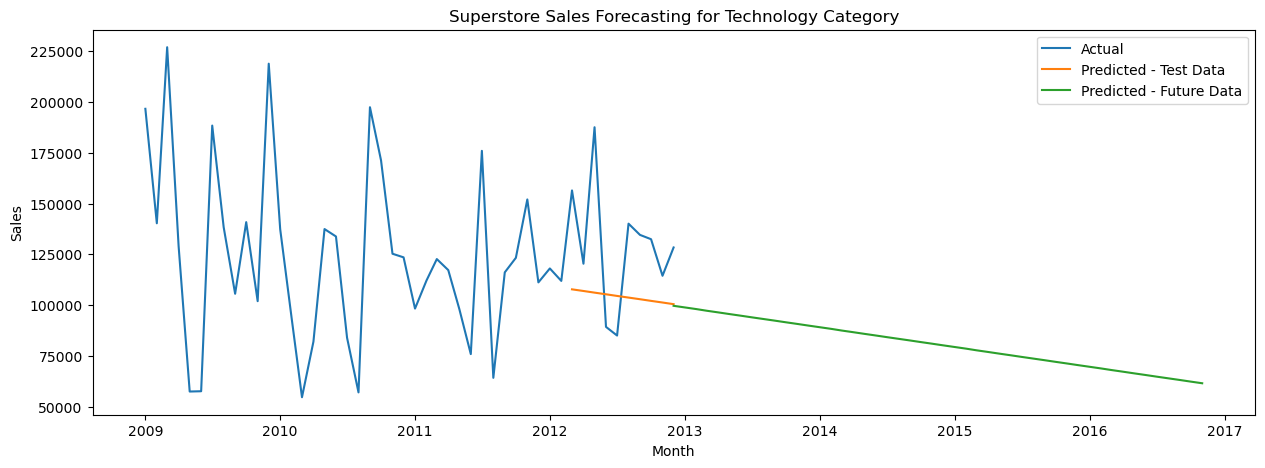

In [53]:
plt.figure(figsize=(15,5))
plt.plot(df['Order Date'], df['Sales'], label='Actual')
plt.plot(test['Order Date'], predictions, label='Predicted - Test Data')
plt.plot(future_index, future_sales, label='Predicted - Future Data')
plt.legend()
plt.title('Superstore Sales Forecasting for Technology Category')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

**Random Forest Regression**

In [54]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
model = RandomForestRegressor(n_estimators=25, random_state=0)
model.fit(train.index.values.reshape(-1,1), train['Sales'])   #feature i.e, date and target variable ie., sales

RandomForestRegressor(n_estimators=25, random_state=0)

In [56]:
predictions = model.predict(test.index.values.reshape(-1,1))

In [57]:
print('Coefficient of determination: %.2f' % r2_score(test['Sales'], predictions))
rmse = np.sqrt(mean_squared_error(test['Sales'], predictions))
print('RMSE:', rmse)

Coefficient of determination: -0.21
RMSE: 31406.1614747964


In [58]:
# Define future index for prediction for next 48months
future_index = pd.date_range(df['Order Date'].iloc[-1], periods=48, freq='MS')

# Generate predictions for future sales
future_sales = model.predict(np.arange(len(df), len(df)+48).reshape(-1,1))

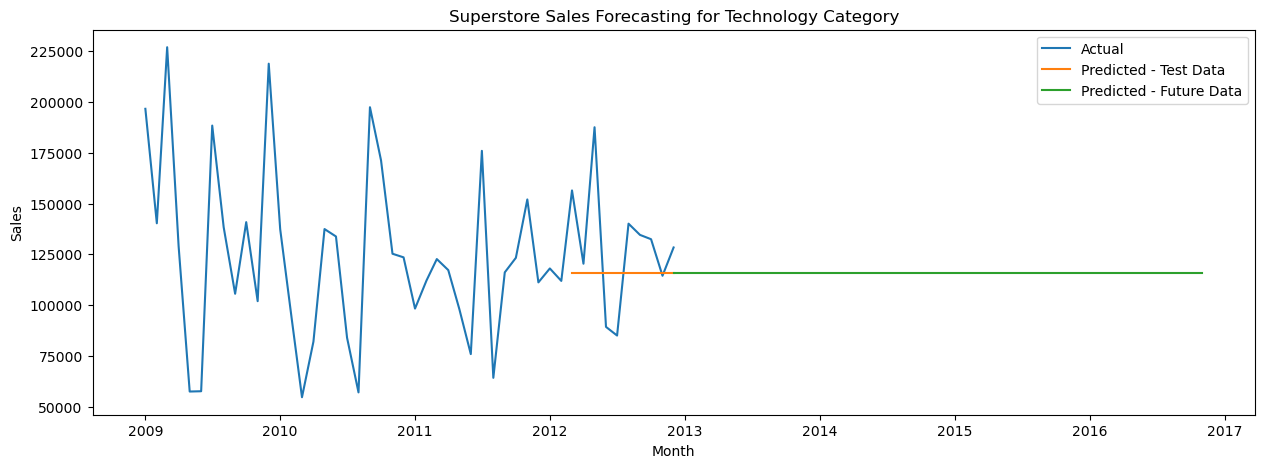

In [59]:
plt.figure(figsize=(15,5))
plt.plot(df['Order Date'], df['Sales'], label='Actual')
plt.plot(test['Order Date'], predictions, label='Predicted - Test Data')
plt.plot(future_index, future_sales, label='Predicted - Future Data')
plt.legend()
plt.title('Superstore Sales Forecasting for Technology Category')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

**Gradient Boosting regression**

In [60]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [61]:
# Load the dataset
df = pd.read_excel("C:/Users/supri/dataset1.xlsx")
df = df.loc[df['Product Category'] == 'Technology']

# Convert the 'Order Date' column to datetime format and set it as the index
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.set_index('Order Date', inplace=True)

# Aggregate the sales data by month
df_monthly = df['Sales'].resample('MS').sum()

In [62]:
# Create a lag feature
df_monthly_shifted = df_monthly.shift(1)

# Create a new DataFrame with lagged feature and remove the first row
df_gb = pd.concat([df_monthly_shifted, df_monthly], axis=1)
df_gb.columns = ['Sales_Lag1', 'Sales']
df_gb.dropna(inplace=True)

In [63]:
# Split the data into training and testing sets
train_size = int(len(df_gb) * 0.8)
train, test = df_gb.iloc[0:train_size], df_gb.iloc[train_size:len(df_gb)]

# Prepare the data for training and testing
X_train, y_train = train['Sales_Lag1'].values.reshape(-1, 1), train['Sales'].values
X_test, y_test = test['Sales_Lag1'].values.reshape(-1, 1), test['Sales'].values

In [64]:
# Create and fit the Gradient Boosting Regression model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, random_state=0)

In [65]:
# Make predictions on the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Make predictions on future data
future_index = pd.date_range(df_gb.index[-1], periods=48, freq='MS')
future_sales = model.predict(df_monthly[-1:].values.reshape(-1, 1))
for i in range(47):
    future_sales = np.append(future_sales, model.predict(future_sales[-1:].reshape(-1, 1)))

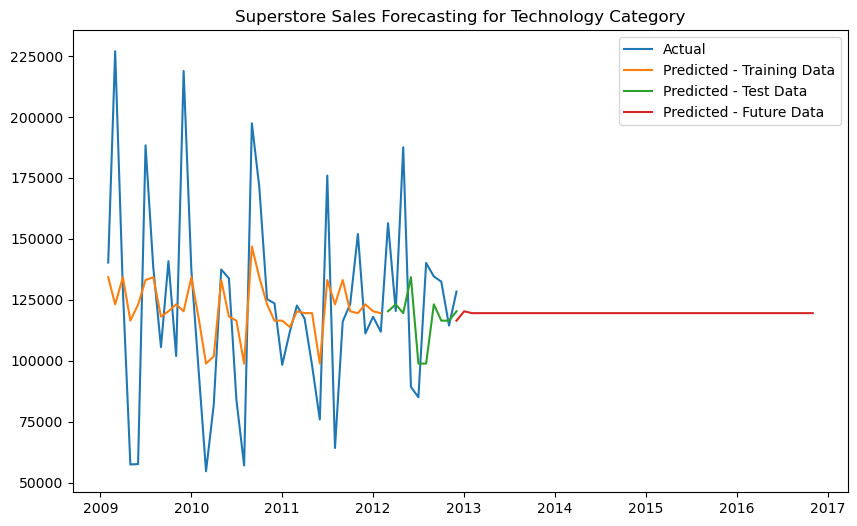

In [66]:
# Plot the actual, predicted and future sales data
fig=plt.figure(figsize=(10,6))
plt.plot(df_gb.index, df_gb['Sales'], label='Actual')
plt.plot(train.index, train_predictions, label='Predicted - Training Data')
plt.plot(test.index, test_predictions, label='Predicted - Test Data')
plt.plot(future_index, future_sales, label='Predicted - Future Data')
plt.legend()
plt.title('Superstore Sales Forecasting for Technology Category')
plt.show()

In [67]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on test data
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('RMSE:', rmse)


RMSE: 32124.881008526583
